In [123]:
"""
Initial data exploration in order to figure out appropriate functional form of features and general relationships between variables.
Analysis restricted to patch: 10.12
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import datetime
from config import PATH_GDRIVE_MAIN_DIR

PATCH = "Set3.5"
comps_data = pd.read_pickle(f"{PATH_GDRIVE_MAIN_DIR}{PATCH}_compositions_data.pkl")

In [107]:
comps_data.head()

,Game Version,Game Date,GameID,Region,PUUID,Place,Traits,Units,Damage,TeamSize
0,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,lGSiQGg4u5WjMfV7Pwa_0yAeVQWiRlWLdBUHTprvwcIxKnp8fJOxWF-n5DAwswg1oT1_mSl_Oc7H_w,4,"[Chrono2, DarkStar1, Sniper2, Vanguard1]","[{'name': 'Caitlyn', 'tier': 2, 'items': [19, 13]}, {'name': 'Poppy', 'tier': 1, 'items': []}, {'name': 'Blitzcrank', 'tier': 2, 'items': []}, {'name': 'Shen', 'tier': 2, 'items': []}, {'name': 'Mordekaiser', 'tier': 2, 'items': []}, {'name': 'Ashe', 'tier': 2, 'items': [26, 23, 14]}, {'name': 'Jhin', 'tier': 2, 'items': [19, 1, 12]}, {'name': 'WuKong', 'tier': 2, 'items': [37]}, {'name': 'Teemo', 'tier': 2, 'items': [13]}]",85,9
1,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,5bJlUQ7x9kyWb_yqsiSYRnQMdwkmaedv12K0R3q5fXxZs40JC499tru-kwkRsx2pMHnQnmyJf3-D6Q,8,"[Blademaster1, Blaster1, Cybernetic2]","[{'name': 'Fiora', 'tier': 1, 'items': []}, {'name': 'Graves', 'tier': 1, 'items': []}, {'name': 'Lucian', 'tier': 1, 'items': [13, 57, 1]}, {'name': 'Vi', 'tier': 2, 'items': [9, 66]}, {'name': 'Vayne', 'tier': 1, 'items': [23, 19, 22]}, {'name': 'Irelia', 'tier': 1, 'items': []}, {'name': 'Riven', 'tier': 1, 'items': []}, {'name': 'Ekko', 'tier': 1, 'items': [37, 4]}]",19,8
2,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,yObcruw2NrI5JefKYg7BdGzEG5kGkK_y_bBhTVtIII6VtHG0saDGJtp8V9Sm7QRBJGmnrR1dvy1tRQ,1,"[Celestial2, Demolitionist1, ManaReaver1, Mercenary1, Protector1, SpacePirate2]","[{'name': 'Graves', 'tier': 3, 'items': [19, 79, 17]}, {'name': 'Darius', 'tier': 3, 'items': [13, 33, 44]}, {'name': 'Rakan', 'tier': 3, 'items': [37, 35]}, {'name': 'XinZhao', 'tier': 2, 'items': [99, 47, 47]}, {'name': 'Jayce', 'tier': 2, 'items': [68, 45, 55]}, {'name': 'Rumble', 'tier': 1, 'items': []}, {'name': 'Gangplank', 'tier': 1, 'items': [15, 37]}, {'name': 'Thresh', 'tier': 1, 'items': [99, 35, 23]}, {'name': 'Lulu', 'tier': 2, 'items': [69]}]",176,9
3,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,Zl3ow4eRVHe82QmLF3iMqUann-WRabCVRG5UUq_l0vEe41oCppG5HzgCfkbzPBhxQ6dKFxIkvRM7jg,5,"[Blaster1, Demolitionist1, Mercenary1, Rebel2, Starship1]","[{'name': 'Ziggs', 'tier': 2, 'items': [79]}, {'name': 'Malphite', 'tier': 2, 'items': []}, {'name': 'Lucian', 'tier': 1, 'items': []}, {'name': 'MasterYi', 'tier': 2, 'items': []}, {'name': 'Jinx', 'tier': 2, 'items': [19, 13, 12]}, {'name': 'Gangplank', 'tier': 1, 'items': [77, 36, 58]}, {'name': 'Gangplank', 'tier': 1, 'items': []}, {'name': 'AurelionSol', 'tier': 1, 'items': [37, 44, 3]}]",123,8
4,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,T_U9EPGb361XCP4ON62o0hBPZW0TfBhQ7LyjhfFaToEWQx04Se2tE9Y0bMdP72zqlbnJ3cH7RSFcgg,2,"[Blademaster1, Celestial2, Chrono1, ManaReaver1, Protector1, Sniper1]","[{'name': 'Caitlyn', 'tier': 3, 'items': [69, 12]}, {'name': 'JarvanIV', 'tier': 3, 'items': [5, 46]}, {'name': 'Xayah', 'tier': 2, 'items': []}, {'name': 'Rakan', 'tier': 1, 'items': []}, {'name': 'XinZhao', 'tier': 1, 'items': [67]}, {'name': 'Ashe', 'tier': 2, 'items': []}, {'name': 'Irelia', 'tier': 2, 'items': [11, 19, 11]}, {'name': 'Riven', 'tier': 2, 'items': [69, 13, 33]}, {'name': 'Thresh', 'tier': 1, 'items': []}]",150,9


In [124]:
# Need to remove some samples from the previous game version 
comps_data = comps_data.loc[comps_data['Game Version'].str.extract(r'(\d*[.][^.]*)', expand=False) == "10.12",].reset_index(drop=True)
comps_data['Game Version'].unique()

# Clean up the strings and create new boolean win column
comps_data['Win'] = comps_data['Place'] == 1

In [125]:
# Isolate analysis to just top 2 places for now 
comps_data_top2 = comps_data.loc[comps_data['Place'].isin([1,2]),].reset_index(drop=True)

# Flatten lists of traits 
comps_data_traits = comps_data_top2.explode('Traits')

# Flatten lists of unit dicts 
comps_data_units = comps_data_top2.explode('Units')

In [110]:
# Check for duplicated traits within the same game 
sum(comps_data_traits.groupby(['Traits', 'GameID', 'Place']).agg(Counts=('Region', 'count')).Counts != 1)

0

In [118]:
# Compute individual trait winrates
indiv_trait_wr = comps_data_traits.groupby('Traits').agg(WR=('Win', lambda x: sum(x)/len(x)),
                                                            N = ('Place','count')).reset_index().sort_values(by='WR', ascending=False)
indiv_trait_wr
indiv_trait_wr.to_csv(f'{PATH_GDRIVE_MAIN_DIR}Features/10.12_single_trait_wr.csv', index=False)

In [112]:
# Let's compare expected winrates against observed winrates using composition averages 
comps_and_single_trait_wr = comps_data_traits.merge(indiv_trait_wr, on='Traits', how='left')

# Group back up compositions as tuples (lists are not hashable)
comps_single_trait_wr_games = comps_and_single_trait_wr.groupby(['GameID', 'Place']).agg(Expected_WR = ('WR', 'mean'),
                                                                                           Win = ('Win', 'mean'),
                                                                                           Comp = ('Traits', lambda x: tuple(x.sort_values()) if not x.isnull().any() else ())).\
                                                                                           reset_index()
comps_single_trait_wr_games.head()

,GameID,Place,Expected_WR,Win,Comp
0,BR1_1971619187,1,0.522407,True,"(Celestial2, Demolitionist1, ManaReaver1, Mercenary1, Protector1, SpacePirate2)"
1,BR1_1971619187,2,0.512549,False,"(Blademaster1, Celestial2, Chrono1, ManaReaver1, Protector1, Sniper1)"
2,BR1_1971639768,1,0.491731,True,"(Battlecast1, Chrono1, Paragon1, Protector1, Sorcerer3, StarGuardian1)"
3,BR1_1971639768,2,0.502834,False,"(Astro1, Celestial1, Chrono1, DarkStar1, Mystic1, Sniper2, Vanguard1)"
4,BR1_1971677826,1,0.537589,True,"(Blademaster2, Celestial1, Chrono1, ManaReaver1, Rebel1, Starship1)"


Text(0, 0.5, 'Actual WR')

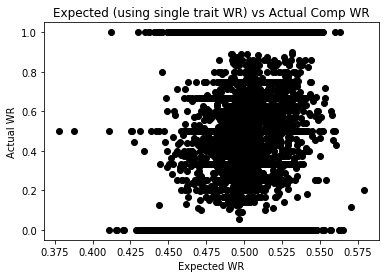

In [113]:
# Now group by compositions and plot expected vs actual winrates 
comps_single_trait_wr = comps_single_trait_wr_games.groupby('Comp').agg(Expected_WR = ("Expected_WR", 'mean'), Actual_WR = ('Win', 'mean'),
                                                                       N = ('GameID', 'count')).reset_index()

plt.plot(comps_single_trait_wr['Expected_WR'], comps_single_trait_wr['Actual_WR'], 'ok')
plt.title("Expected (using single trait WR) vs Actual Comp WR")
plt.xlabel("Expected WR")
plt.ylabel("Actual WR")

The plot above shows that the individual traits are fairly well-balanced, and the strength of individual traits matters less than their synergy in a final team comp. 

In [114]:
# Take a look at the 1/0 winrate comps 
pd.set_option('display.max_colwidth', -1)

comps_single_trait_wr.loc[comps_single_trait_wr.Actual_WR.isin([0,1]),].sort_values("N", ascending=False)

,Comp,Expected_WR,Actual_WR,N
5281,"(Blaster1, Brawler1, Chrono2, Cybernetic2, ManaReaver1, Vanguard1)",0.517832,1.0,8
1377,"(Battlecast1, Blaster1, Brawler2, Chrono1, Rebel1)",0.487231,0.0,8
9555,"(Demolitionist1, Infiltrator2, MechPilot1, Mercenary1, Paragon1)",0.469119,0.0,8
8136,"(Chrono1, DarkStar1, Mystic1, Sorcerer2, StarGuardian1, Vanguard1)",0.494464,1.0,8
575,"(Astro1, Brawler1, Cybernetic1, Sniper1, Starship1, Vanguard1)",0.493043,0.0,7
...,...,...,...,...
3480,"(Battlecast4, Blaster1, Mystic1)",0.434638,1.0,1
3479,"(Battlecast4, Blaster1, Brawler2, Chrono1)",0.444647,0.0,1
3478,"(Battlecast4, Blaster1, Brawler1, Infiltrator1, Mystic1, Rebel1)",0.472445,0.0,1
3477,"(Battlecast3, Mystic2, Vanguard1)",0.459711,0.0,1


In [115]:
assert len(comps_single_trait_wr_games.loc[comps_single_trait_wr_games.Comp == (),]) == \
len(comps_data_traits.loc[comps_data_traits.Traits.isna(),])

In [116]:
# Average # traits in a comp 
comps_data_top2['Traits'].apply(len).mean()

5.172065873508847

In [126]:
comps_data_top2.head()

,Game Version,Game Date,GameID,Region,PUUID,Place,Traits,Units,Damage,TeamSize,Win
0,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,yObcruw2NrI5JefKYg7BdGzEG5kGkK_y_bBhTVtIII6VtHG0saDGJtp8V9Sm7QRBJGmnrR1dvy1tRQ,1,"[Celestial2, Demolitionist1, ManaReaver1, Mercenary1, Protector1, SpacePirate2]","[{'name': 'Graves', 'tier': 3, 'items': [19, 79, 17]}, {'name': 'Darius', 'tier': 3, 'items': [13, 33, 44]}, {'name': 'Rakan', 'tier': 3, 'items': [37, 35]}, {'name': 'XinZhao', 'tier': 2, 'items': [99, 47, 47]}, {'name': 'Jayce', 'tier': 2, 'items': [68, 45, 55]}, {'name': 'Rumble', 'tier': 1, 'items': []}, {'name': 'Gangplank', 'tier': 1, 'items': [15, 37]}, {'name': 'Thresh', 'tier': 1, 'items': [99, 35, 23]}, {'name': 'Lulu', 'tier': 2, 'items': [69]}]",176,9,True
1,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,T_U9EPGb361XCP4ON62o0hBPZW0TfBhQ7LyjhfFaToEWQx04Se2tE9Y0bMdP72zqlbnJ3cH7RSFcgg,2,"[Blademaster1, Celestial2, Chrono1, ManaReaver1, Protector1, Sniper1]","[{'name': 'Caitlyn', 'tier': 3, 'items': [69, 12]}, {'name': 'JarvanIV', 'tier': 3, 'items': [5, 46]}, {'name': 'Xayah', 'tier': 2, 'items': []}, {'name': 'Rakan', 'tier': 1, 'items': []}, {'name': 'XinZhao', 'tier': 1, 'items': [67]}, {'name': 'Ashe', 'tier': 2, 'items': []}, {'name': 'Irelia', 'tier': 2, 'items': [11, 19, 11]}, {'name': 'Riven', 'tier': 2, 'items': [69, 13, 33]}, {'name': 'Thresh', 'tier': 1, 'items': []}]",150,9,False
2,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:25:56.616,BR1_1971639768,BR1,WUrVXBxv_fe-_sERA5k_IGTFyFHJ_IiElbiYHB_b2TjKjZQ8CEFACAEbtvLZ6gqK6kiJ4l2QbjzgiA,1,"[Battlecast1, Chrono1, Paragon1, Protector1, Sorcerer3, StarGuardian1]","[{'name': 'TwistedFate', 'tier': 2, 'items': [27, 36]}, {'name': 'Zoe', 'tier': 1, 'items': []}, {'name': 'Ahri', 'tier': 2, 'items': []}, {'name': 'Syndra', 'tier': 2, 'items': []}, {'name': 'Viktor', 'tier': 2, 'items': [37]}, {'name': 'Riven', 'tier': 2, 'items': [69, 33, 78]}, {'name': 'Xerath', 'tier': 1, 'items': [26]}, {'name': 'Urgot', 'tier': 2, 'items': [44, 15, 16]}, {'name': 'Janna', 'tier': 2, 'items': []}]",197,9,True
3,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:25:56.616,BR1_1971639768,BR1,mm6mPTo1h4fnPYQQ72Cs7bjH24IaBpi7xXUflV8P6ypSxyJuqhLo84XPbeOmiZ5jc9Iqs5u2WI1t7w,2,"[Astro1, Celestial1, Chrono1, DarkStar1, Mystic1, Sniper2, Vanguard1]","[{'name': 'Caitlyn', 'tier': 1, 'items': []}, {'name': 'Nautilus', 'tier': 2, 'items': []}, {'name': 'Ashe', 'tier': 2, 'items': [11, 89]}, {'name': 'Soraka', 'tier': 2, 'items': [69]}, {'name': 'Jhin', 'tier': 2, 'items': [26, 79, 57]}, {'name': 'WuKong', 'tier': 2, 'items': []}, {'name': 'Gnar', 'tier': 2, 'items': [99, 12, 22]}, {'name': 'Teemo', 'tier': 2, 'items': []}, {'name': 'Lulu', 'tier': 2, 'items': [47, 44, 14]}]",167,9,False
4,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:07:11.029,BR1_1971677826,BR1,HozNIix1SOK2tcn5mMCf_pxtc2NvJNNyVSEN35gej6G5SMOQUOaKTOaPCm39xkNoeYp74r9YIVuCxg,1,"[Blademaster2, Celestial1, Chrono1, ManaReaver1, Rebel1, Starship1]","[{'name': 'Xayah', 'tier': 2, 'items': []}, {'name': 'Yasuo', 'tier': 3, 'items': [14, 12, 17]}, {'name': 'Shen', 'tier': 2, 'items': [15]}, {'name': 'MasterYi', 'tier': 3, 'items': [69, 77, 55]}, {'name': 'Irelia', 'tier': 2, 'items': [99, 46, 33]}, {'name': 'Riven', 'tier': 2, 'items': []}, {'name': 'AurelionSol', 'tier': 1, 'items': []}, {'name': 'Thresh', 'tier': 2, 'items': [68, 23]}]",205,8,True


#### Now let's look at every pair of traits (proxy for synergy)

In [128]:
from itertools import combinations 

comps_traits_pairs = comps_data_top2.copy()
comps_traits_pairs.Traits = comps_traits_pairs.Traits.apply(lambda x: tuple(combinations(x, 2)))
comps_traits_pairs.head()

,Game Version,Game Date,GameID,Region,PUUID,Place,Traits,Units,Damage,TeamSize,Win
0,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,yObcruw2NrI5JefKYg7BdGzEG5kGkK_y_bBhTVtIII6VtHG0saDGJtp8V9Sm7QRBJGmnrR1dvy1tRQ,1,"((Celestial2, Demolitionist1), (Celestial2, ManaReaver1), (Celestial2, Mercenary1), (Celestial2, Protector1), (Celestial2, SpacePirate2), (Demolitionist1, ManaReaver1), (Demolitionist1, Mercenary1), (Demolitionist1, Protector1), (Demolitionist1, SpacePirate2), (ManaReaver1, Mercenary1), (ManaReaver1, Protector1), (ManaReaver1, SpacePirate2), (Mercenary1, Protector1), (Mercenary1, SpacePirate2), (Protector1, SpacePirate2))","[{'name': 'Graves', 'tier': 3, 'items': [19, 79, 17]}, {'name': 'Darius', 'tier': 3, 'items': [13, 33, 44]}, {'name': 'Rakan', 'tier': 3, 'items': [37, 35]}, {'name': 'XinZhao', 'tier': 2, 'items': [99, 47, 47]}, {'name': 'Jayce', 'tier': 2, 'items': [68, 45, 55]}, {'name': 'Rumble', 'tier': 1, 'items': []}, {'name': 'Gangplank', 'tier': 1, 'items': [15, 37]}, {'name': 'Thresh', 'tier': 1, 'items': [99, 35, 23]}, {'name': 'Lulu', 'tier': 2, 'items': [69]}]",176,9,True
1,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:11:28.929,BR1_1971619187,BR1,T_U9EPGb361XCP4ON62o0hBPZW0TfBhQ7LyjhfFaToEWQx04Se2tE9Y0bMdP72zqlbnJ3cH7RSFcgg,2,"((Blademaster1, Celestial2), (Blademaster1, Chrono1), (Blademaster1, ManaReaver1), (Blademaster1, Protector1), (Blademaster1, Sniper1), (Celestial2, Chrono1), (Celestial2, ManaReaver1), (Celestial2, Protector1), (Celestial2, Sniper1), (Chrono1, ManaReaver1), (Chrono1, Protector1), (Chrono1, Sniper1), (ManaReaver1, Protector1), (ManaReaver1, Sniper1), (Protector1, Sniper1))","[{'name': 'Caitlyn', 'tier': 3, 'items': [69, 12]}, {'name': 'JarvanIV', 'tier': 3, 'items': [5, 46]}, {'name': 'Xayah', 'tier': 2, 'items': []}, {'name': 'Rakan', 'tier': 1, 'items': []}, {'name': 'XinZhao', 'tier': 1, 'items': [67]}, {'name': 'Ashe', 'tier': 2, 'items': []}, {'name': 'Irelia', 'tier': 2, 'items': [11, 19, 11]}, {'name': 'Riven', 'tier': 2, 'items': [69, 13, 33]}, {'name': 'Thresh', 'tier': 1, 'items': []}]",150,9,False
2,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:25:56.616,BR1_1971639768,BR1,WUrVXBxv_fe-_sERA5k_IGTFyFHJ_IiElbiYHB_b2TjKjZQ8CEFACAEbtvLZ6gqK6kiJ4l2QbjzgiA,1,"((Battlecast1, Chrono1), (Battlecast1, Paragon1), (Battlecast1, Protector1), (Battlecast1, Sorcerer3), (Battlecast1, StarGuardian1), (Chrono1, Paragon1), (Chrono1, Protector1), (Chrono1, Sorcerer3), (Chrono1, StarGuardian1), (Paragon1, Protector1), (Paragon1, Sorcerer3), (Paragon1, StarGuardian1), (Protector1, Sorcerer3), (Protector1, StarGuardian1), (Sorcerer3, StarGuardian1))","[{'name': 'TwistedFate', 'tier': 2, 'items': [27, 36]}, {'name': 'Zoe', 'tier': 1, 'items': []}, {'name': 'Ahri', 'tier': 2, 'items': []}, {'name': 'Syndra', 'tier': 2, 'items': []}, {'name': 'Viktor', 'tier': 2, 'items': [37]}, {'name': 'Riven', 'tier': 2, 'items': [69, 33, 78]}, {'name': 'Xerath', 'tier': 1, 'items': [26]}, {'name': 'Urgot', 'tier': 2, 'items': [44, 15, 16]}, {'name': 'Janna', 'tier': 2, 'items': []}]",197,9,True
3,Version 10.12.323.8771 (Jun 04 2020/15:31:11) [PUBLIC] <Releases/10.12>,2020-06-11 00:25:56.616,BR1_1971639768,BR1,mm6mPTo1h4fnPYQQ72Cs7bjH24IaBpi7xXUflV8P6ypSxyJuqhLo84XPbeOmiZ5jc9Iqs5u2WI1t7w,2,"((Astro1, Celestial1), (Astro1, Chrono1), (Astro1, DarkStar1), (Astro1, Mystic1), (Astro1, Sniper2), (Astro1, Vanguard1), (Celestial1, Chrono1), (Celestial1, DarkStar1), (Celestial1, Mystic1), (Celestial1, Sniper2), (Celestial1, Vanguard1), (Chrono1, DarkStar1), (Chrono1, Mystic1), (Chrono1, Sniper2), (Chrono1, Vanguard1), (DarkStar1, Mystic1), (DarkStar1, Sniper2), (DarkStar1, Vanguard1), (Mystic1, Sniper2), (Mystic1, Vanguard1), (Sniper2, Vanguard1))","[{'name': 'Caitlyn', 'tier': 1, 'items': []}, {'name': 'Nautilus', 'tier': 2, 'items': []}, {'name': 'Ashe', 'tier': 2, 'i

In [129]:
comps_traits_pairs_long = comps_traits_pairs.explode('Traits')

In [133]:
# Compute paired winrates 
comps_traits_pairs_wr = comps_traits_pairs_long.groupby('Traits').agg(Paired_WR = ('Win', 'mean'), N = ('GameID', 'count')).\
                                                                reset_index().sort_values(by=['Paired_WR', 'N'], ascending=False)
comps_traits_pairs_wr.to_csv(f'{PATH_GDRIVE_MAIN_DIR}Features/10.12_paired_trait_wr.csv', index=False)

comps_traits_pairs_wr.head()

,Traits,Paired_WR,N
89,"(Battlecast1, StarGuardian3)",1.0,5
276,"(Blaster1, Sniper2)",1.0,4
217,"(Blademaster2, Infiltrator3)",1.0,3
36,"(Astro1, Sorcerer3)",1.0,2
241,"(Blademaster3, Infiltrator2)",1.0,2


In [ ]:
# 